# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: integer
- `Glucose`: float
- `BloodPressure`: int
- `SkinThickness`: float
- `Insulin`: int
- `BMI`: float
- `DiabetesPedigreeFunction`: int
- `Age`: int
- `Outcome`: int

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# load in data
diabetes = pd.read_csv('diabetes.csv')

3. How many columns (features) does the data contain?

In [99]:
# print number of columns
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


4. How many rows (observations) does the data contain?

## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [100]:
# find whether columns contain null values
# df[df.columns[df.isna().any()]]
diabetes[diabetes.columns[diabetes.isna().any()]]

""
0
1
2
3
4
...
763
764
765
766


6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [6]:
# perform summary statistics


7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

**Your response to question 7**:

8. Do you spot any other outliers in the data?
* yes - insulin level max is 846
* "A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes."
* 17 pregnancies is a lot...
* Skin Fold Thickness Max is 99. From Research: In the study population, the average TSF thickness was 18.7 ± 8.5 mm. Women have much higher TSF thickness than men (23.6 ± 7.5 mm vs 14.3 ± 6.8 mm)
* BMI max of 67 is extremely high. 32 is morbidly obese

**Your response to question 8**:

9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
   ```

In [101]:
# replace instances of 0 with NaN
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [102]:
# find whether columns contain null values after replacements are made
print(diabetes.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [103]:
# print rows with missing values
diabetes[diabetes.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**:

13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

In [104]:
# print data types using .info() method
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [105]:
# print unique values of Outcome column
diabetes.Outcome.unique()

array(['1', '0', 'O'], dtype=object)

15. How might you resolve this issue?

In [106]:
diabetes.Outcome.replace('O','0', inplace=True)

In [107]:
diabetes.Outcome.unique()
diabetes.Outcome = diabetes.Outcome.astype('int')

**Your response to question 15**:

## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.

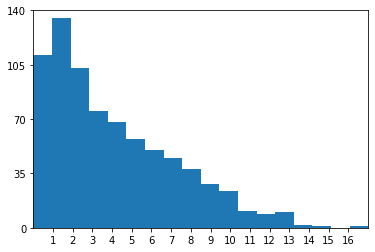

In [68]:
fig, ax = plt.subplots()
ax.hist(diabetes.Pregnancies,bins=18)
ax.set(xlim=(0, 17), xticks=np.arange(1, 17),
       ylim=(0, 140), yticks=np.linspace(0, 140, 5))
plt.show()

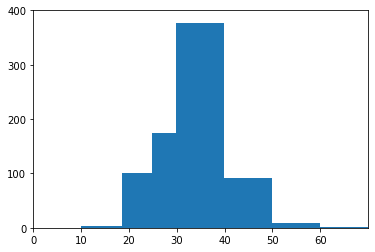

In [69]:
fig, ax = plt.subplots()
ax.hist(diabetes.BMI,bins=[0,10,18.5,24.9,29.9,39.9,49.9,59.9,70])
ax.set(xlim=(10, 70), xticks=np.arange(0, 70, 10),
       ylim=(0, 30), yticks=np.linspace(0, 400, 5))
plt.show()

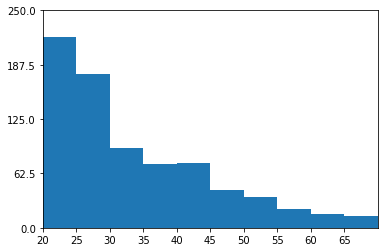

In [70]:
fig, ax = plt.subplots()
ax.hist(diabetes.Age,bins=[20,25,30,35,40,45,50,55,60,65,70])
ax.set(xlim=(20, 70), xticks=np.arange(20, 70, 5),
       ylim=(0, 30), yticks=np.linspace(0, 250, 5))
plt.show()

In [111]:
new_diabetes = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].fillna(diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].mean())
print(new_diabetes.head())

   Glucose  BloodPressure  SkinThickness     Insulin   BMI
0    148.0           72.0       35.00000  155.548223  33.6
1     85.0           66.0       29.00000  155.548223  26.6
2    183.0           64.0       29.15342  155.548223  23.3
3     89.0           66.0       23.00000   94.000000  28.1
4    137.0           40.0       35.00000  168.000000  43.1


In [109]:
new_diabetes.BMI.value_counts()

32.000000    13
31.600000    12
31.200000    12
32.457464    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: BMI, Length: 248, dtype: int64

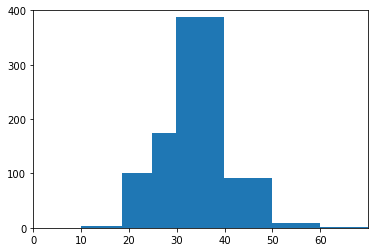

In [73]:
fig, ax = plt.subplots()
ax.hist(new_diabetes.BMI,bins=[0,10,18.5,24.9,29.9,39.9,49.9,59.9,70])
ax.set(xlim=(10, 70), xticks=np.arange(0, 70, 10),
       ylim=(0, 30), yticks=np.linspace(0, 400, 5))
plt.show()

In [75]:
new_diabetes.BloodPressure.value_counts()

70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
72.405184     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.000000     3
55.000000      2
108.000000     2
104.000000     2
46.000000      2
30.000000      2
122.000000     1
95.000000      1
102.000000     1
61.000000      1
24.000000      1
38.000000      1
40.000000      1
114.000000     1
Name: BloodPressure, dtype: int64

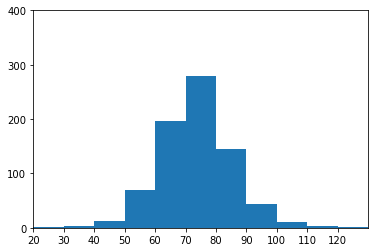

In [78]:
fig, ax = plt.subplots()
ax.hist(new_diabetes.BloodPressure,bins=[20,30,40,50,60,70,80,90,100,110,120,130])
ax.set(xlim=(20, 130), xticks=np.arange(20, 130, 10),
       ylim=(0, 30), yticks=np.linspace(0, 400, 5))
plt.show()

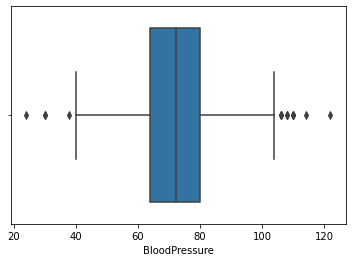

In [80]:
sns.boxplot(x='BloodPressure', data=new_diabetes)
plt.show()
plt.close()

In [83]:
cov_BP_BMI = np.cov(new_diabetes.BloodPressure,new_diabetes.BMI)
print(cov_BP_BMI)

[[146.321591    23.39140668]
 [ 23.39140668  47.26770578]]


In [84]:
corr_BP_BMI, p = pearsonr(new_diabetes.BloodPressure, new_diabetes.BMI)
print(corr_BP_BMI)

0.2812677055165901


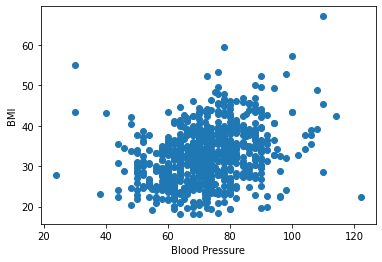

In [85]:
plt.scatter(x = new_diabetes.BloodPressure, y = new_diabetes.BMI)
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.show()

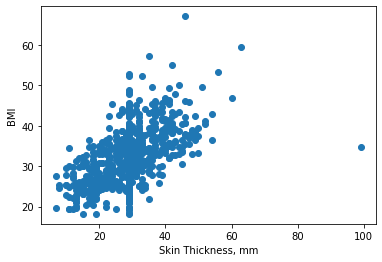

[[77.28065994 32.78200663]
 [32.78200663 47.26770578]]
0.5423977271776975


In [87]:
plt.scatter(x = new_diabetes.SkinThickness, y = new_diabetes.BMI)
plt.xlabel('Skin Thickness, mm')
plt.ylabel('BMI')
plt.show()

cov_BMI_skin = np.cov(new_diabetes.SkinThickness, new_diabetes.BMI)
print(cov_BMI_skin)

corr_BMI_skin, p = pearsonr(new_diabetes.SkinThickness, new_diabetes.BMI)
print(corr_BMI_skin)

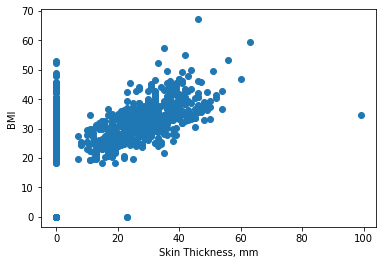

[[254.47324533  49.37386938]
 [ 49.37386938  62.15998396]]
0.3925732041590383


In [88]:
plt.scatter(x = diabetes.SkinThickness, y = diabetes.BMI)
plt.xlabel('Skin Thickness, mm')
plt.ylabel('BMI')
plt.show()

cov_BMI_skin_old = np.cov(diabetes.SkinThickness, diabetes.BMI)
print(cov_BMI_skin_old)

corr_BMI_skin_old, p = pearsonr(diabetes.SkinThickness, diabetes.BMI)
print(corr_BMI_skin_old)

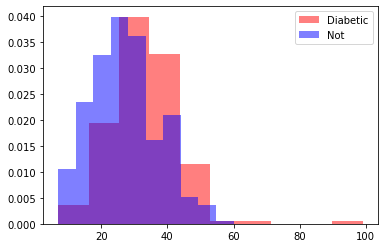

In [114]:
diabetic_Skin = diabetes.SkinThickness[diabetes.Outcome == 1]
not_Skin = diabetes.SkinThickness[diabetes.Outcome == 0]
plt.hist(diabetic_Skin, color = "red", density = True, alpha = 0.5, label = 'Diabetic')
plt.hist(not_Skin, color = "blue", density = True, alpha = 0.5, label = 'Not')
plt.legend()
plt.show()